In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

In [3]:
np.random.seed(107)

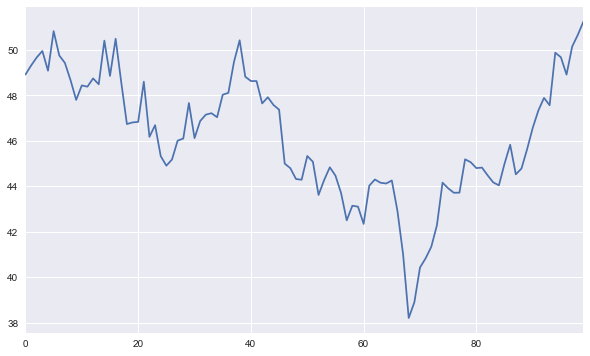

In [5]:
#generate daily returns
Xret = np.random.normal(0,1,100)

#sum and shift the prices up
X = pd.Series(np.cumsum(Xret), name='X')+50
X.plot(figsize=(10,6))
plt.show()

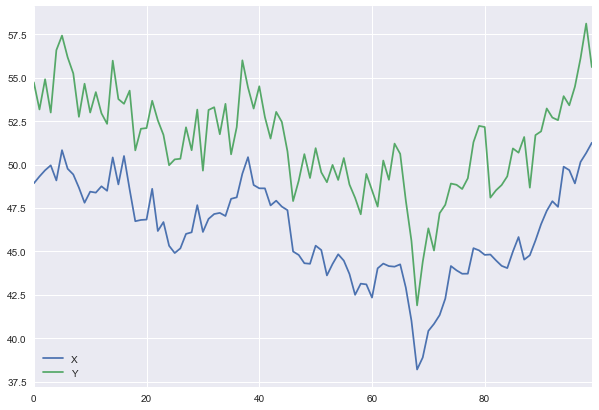

In [10]:
noise = np.random.normal(0,1,100)
Y = X + 5 + noise
Y.name = 'Y'

pd.concat([X,Y], axis=1).plot(figsize=(10,7))
plt.show()

In [9]:
test = np.random.normal(0,1,10)
test

array([ 0.01273847, -0.44812392,  0.4010955 , -0.56631978, -0.88047957,
       -2.75192209,  0.88819919, -1.05632128, -1.1200753 ,  0.52828882])

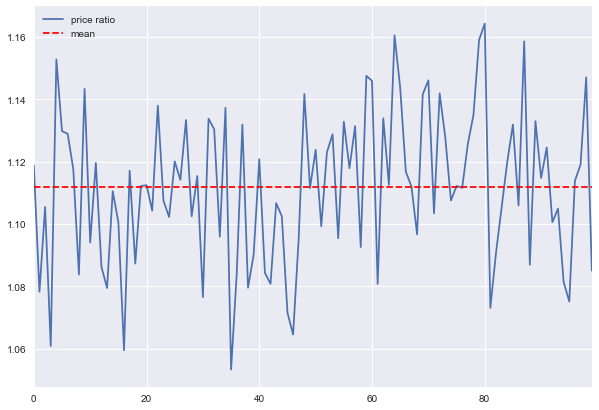

In [11]:
(Y/X).plot(figsize=(10,7))

plt.axhline((Y/X).mean(), color='red', ls='--')
plt.legend(['price ratio', 'mean'])
plt.show()

In [13]:
score, pvalue,_ = coint(X,Y)
print(pvalue)

1.1376575057624293e-14


In [17]:
res = coint(Y,X)
res

(-10.584499606033432,
 8.619008726169863e-18,
 array([-4.01048603, -3.39854434, -3.08756793]))

In [18]:
import pandas_datareader.data as web
from datetime import datetime

In [21]:
start = datetime(2000,12,12)
end = datetime(2016,12,12)
stocks = ['AAPL', 'ADBE', 'EBAY', 'MSFT', 'QCOM', 'HPQ', 'JNPR', 'AMD', 'IBM']

In [22]:
data = web.DataReader(stocks, 'yahoo', start, end)['Adj Close']

In [24]:
#data.head(20)

In [44]:
prices = web.DataReader('^GSPC', 'yahoo',start, end)['Adj Close']
prices = pd.DataFrame(prices)
prices = prices.rename(columns={'Adj Close':'SPY'})

In [45]:
prices.head()

,SPY
Date,
2000-12-11,1380.199951
2000-12-12,1371.180054
2000-12-13,1359.989990
2000-12-14,1340.930054
2000-12-15,1312.150024


In [34]:
def find_coint_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n,n))
    pvalue_matrix = np.ones((n,n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            s1 = data[keys[i]]
            s2 = data[keys[j]]
            result = coint(s1,s2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i,j] = score
            pvalue_matrix[i,j] = pvalue
            if pvalue < 0.02:
                pairs.append((keys[i],keys[j]))
    
    
    return score_matrix, pvalue_matrix, pairs

In [46]:
all_prices = pd.merge(prices, data, left_index=True, right_index=True)

In [47]:
all_prices.head()

,SPY,AAPL,ADBE,EBAY,MSFT,QCOM,HPQ,JNPR,AMD,IBM
Date,,,,,,,,,,
2000-12-11,1380.199951,0.943904,36.822948,4.508917,18.677479,35.201004,7.997274,146.835388,17.3125,62.869694
2000-12-12,1371.180054,0.955557,35.115295,4.243306,18.778004,31.773787,8.510302,144.205307,17.2500,62.125172
2000-12-13,1359.989990,0.932251,32.879837,4.068391,18.416111,32.304451,8.012361,138.777328,16.7500,60.387989
2000-12-14,1340.930054,0.897291,28.471027,3.835171,17.853168,31.154671,8.087805,121.989769,16.5000,61.173874
2000-12-15,1312.150024,0.873985,31.016964,3.938825,15.822574,28.147535,7.635131,115.386635,16.1875,58.113071


In [48]:
stocks = stocks + ['SPY']

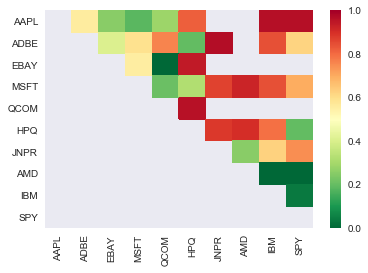

In [52]:
#create a heat map to show the pvalues of the cointegration test
scores, pvalues, pairs = find_coint_pairs(all_prices)
import seaborn
m = [0,0.2,0.4,0.6,0.8,1]
seaborn.heatmap(pvalues, xticklabels=stocks, yticklabels=stocks, cmap\
               ='RdYlGn_r', mask=(pvalues>=0.98))
plt.show()

In [53]:
pairs

[('ADBE', 'MSFT'), ('JNPR', 'AMD'), ('JNPR', 'IBM')]